In [3]:
#!pip install scikit-learn
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install numpy

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedGroupKFold, train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

In [5]:
df = pd.read_csv(r'preprocess_IndianWeatherRepository.csv')
df

,temperature_celsius,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moon_phase,moon_illumination
0,27.5,12.8,20.5,281,1008.0,29.77,0.00,0.0,67,26,...,1.7,3.1,12.6,18.5,1,2,21540,67260,Waxing Gibbous,93
1,27.5,9.6,15.5,287,1008.0,29.78,0.00,0.0,70,19,...,2.1,2.6,10.7,14.2,1,1,21600,67200,Waxing Gibbous,93
2,26.3,11.4,18.4,317,1009.0,29.78,0.00,0.0,70,51,...,0.6,1.7,16.8,20.7,2,2,21360,66840,Waxing Gibbous,93
3,25.6,10.5,16.9,297,1009.0,29.80,0.00,0.0,76,65,...,1.2,1.1,4.9,6.6,1,1,21600,67080,Waxing Gibbous,93
4,27.2,10.1,16.2,274,1009.0,29.79,0.00,0.0,74,82,...,2.2,1.8,11.4,14.8,1,1,21660,67140,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,27.0,3.8,6.1,360,1007.0,29.74,0.00,0.0,74,0,...,33.2,7.0,370.6,464.8,6,10,22260,65340,Full Moon,100
18051,24.2,2.2,3.6,28,1007.0,29.72,0.00,0.0,99,100,...,1.7,0.3,6.6,7.2,1,1,18660,61800,Full Moon,100
18052,25.1,7.8,12.6,277,1007.0,29.73,0.00,0.0,66,31,...,7.2,1.5,5.4,7.6,1,1,21720,65040,Full Moon,100
18053,22.1,6.9,11.2,266,1011.0,29.84,0.05,0.0,92,84,...,3.0,1.5,2.1,2.5,1,1,22140,65580,Full Moon,100


In [6]:
cat_features = []
for column in df.columns:
    if df[column].dtype == np.dtype('object'):
        cat_features.append(column)
cat_features

['moon_phase']

In [7]:
target = 'moon_phase'
num_features = list(set(df.columns) - set(cat_features))
cat_features.remove(target)

In [8]:
features = num_features

# Обучение моделей

In [9]:
pd.value_counts(df[target].values.ravel())

Waxing Crescent    3837
Waxing Gibbous     3828
Waning Crescent    3283
Waning Gibbous     3275
Full Moon          1644
New Moon           1094
First Quarter       549
Last Quarter        545
Name: count, dtype: int64

In [10]:
X_train, X_val, y_train, y_val = train_test_split(df[features].values, 
                                                  df[target].values, 
                                                  test_size=0.2,
                                                  random_state=42)

In [11]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((14444, 25), (14444,), (3611, 25), (3611,))

In [ ]:
df

## KNN

In [13]:
knn_pipeline = Pipeline(
    [("scaler", StandardScaler()), 
     ("knn", KNeighborsClassifier(n_jobs=-1, n_neighbors=5))]
)
knn_pipeline.fit(X_train, y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

## SVM

In [14]:
from sklearn import svm

In [15]:
svm.SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
svc_pipeline = Pipeline(
    [("scaler", StandardScaler()), 
     ("svc", svm.SVC(probability=True, C=1, kernel='rbf'))]
)
svc_pipeline.fit(X_train, y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, probability=True))])

## Descision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
dt = DecisionTreeClassifier(max_depth=256, criterion='entropy', splitter='best')
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=256)

# Оценка моделей

In [20]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [21]:
def get_metrics_table(models: dict, metrics, X_test, y_test, transformer):
    res = pd.DataFrame()
    res['model'] = models.keys()
    m = []
    metr = []
    for metric in metrics:
        metr = []
        for model_name in res['model'].values:
            if metric == 'accuracy':
                metr.append(metrics[metric](transformer.transform(y_test), transformer.transform(models[model_name].predict(X_test))))
            elif metric != 'roc_auc_score':
                metr.append(metrics[metric](transformer.transform(y_test), transformer.transform(models[model_name].predict(X_test)), average='macro'))
            else:
                metr.append(metrics[metric](transformer.transform(y_test), transformer.transform(models[model_name].predict(X_test)),  multi_class='ovr'))
        res[metric] = metr
    return res

In [22]:
le = LabelEncoder()
le.fit(df[target])
le.transform(y_val)
None

In [23]:
models = {
    'knn (scaled)': knn_pipeline,
    'svm (scaled)': svc_pipeline,
    'descision tree (scaled)': dt
}

In [24]:
metrics = { 'precision_score': precision_score,
        'recall_score': recall_score,
        'f1_score': f1_score,
        'accuracy': accuracy_score
        }

In [25]:
metric_df = get_metrics_table(models=models,
                              metrics=metrics,
                              X_test=X_val,
                              y_test=y_val,
                              transformer=le)
metric_df

,model,precision_score,recall_score,f1_score,accuracy
0,knn (scaled),0.696229,0.672288,0.682246,0.774301
1,svm (scaled),0.886190,0.775836,0.807089,0.872888
2,descision tree (scaled),0.968619,0.970202,0.969368,0.967876


## Визуализация предсказаний

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc

In [27]:
def draw_conf_matrix(models: dict, X_test, y_test):
    n = len(models.keys())
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
    for model_name, ax in zip(models.keys(), axes.flatten()):
        cm = confusion_matrix(y_test, models[model_name].predict(X_test), labels=models[model_name].classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax.title.set_text(model_name)
        disp.plot(ax=ax)
    plt.tight_layout()  
    plt.show()

In [28]:
models = {
    'descision tree': dt,
    'svm': svc_pipeline,
    'k neighbouts': knn_pipeline
}

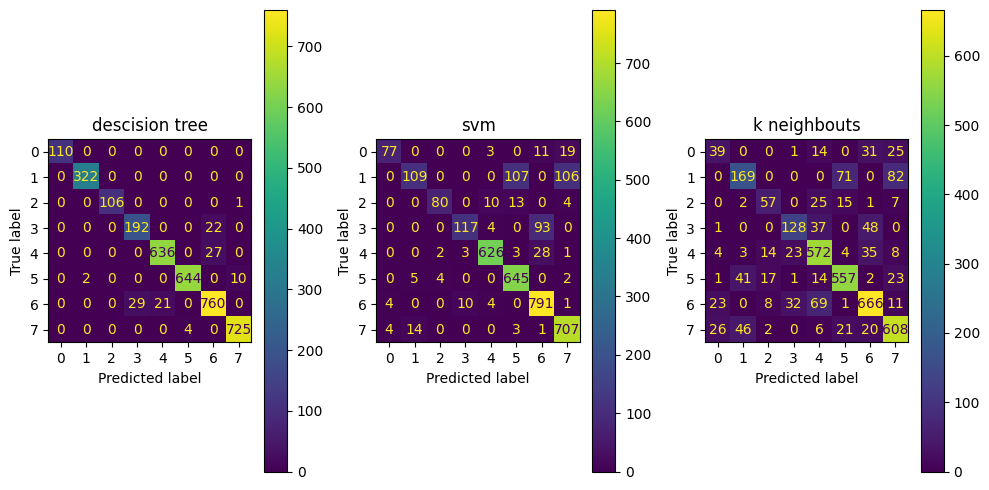

In [29]:
draw_conf_matrix(models=models,
                 X_test=X_val,
                 y_test=y_val)

## Оценка по метрикам

In [30]:
from itertools import cycle
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import RocCurveDisplay

In [31]:
def draw_rocauc_graphic(model, le, X_val, y_val):
    y_test = y_val
    y_score = model.predict_proba(X_val)
    n_classes = len(le.classes_)
    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="micro",
    )
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {le.classes_[class_id]}",
            color=color,
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
    plt.legend()
    plt.show()

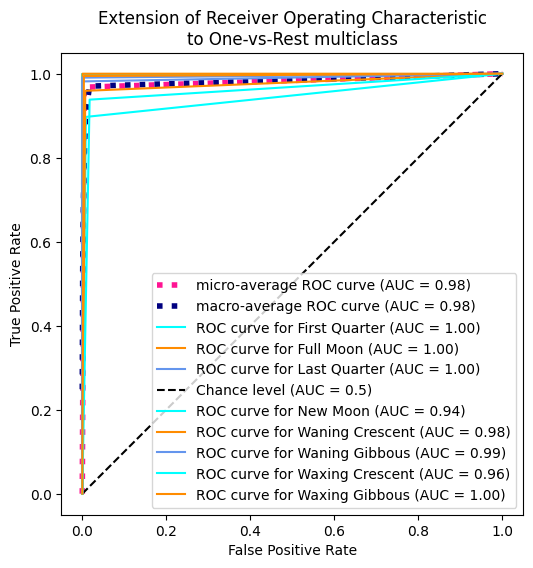

In [32]:
draw_rocauc_graphic(dt, le, X_val, y_val)


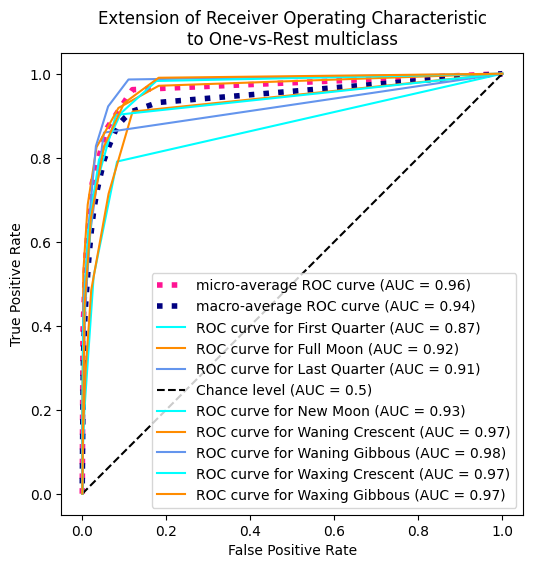

In [33]:
draw_rocauc_graphic(knn_pipeline, le, X_val, y_val)

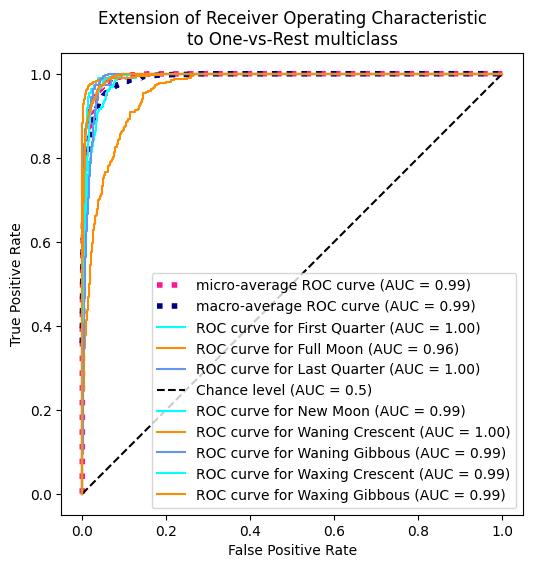

In [34]:
draw_rocauc_graphic(svc_pipeline, le, X_val, y_val)

## Визуализация дерева

In [35]:
from sklearn import tree

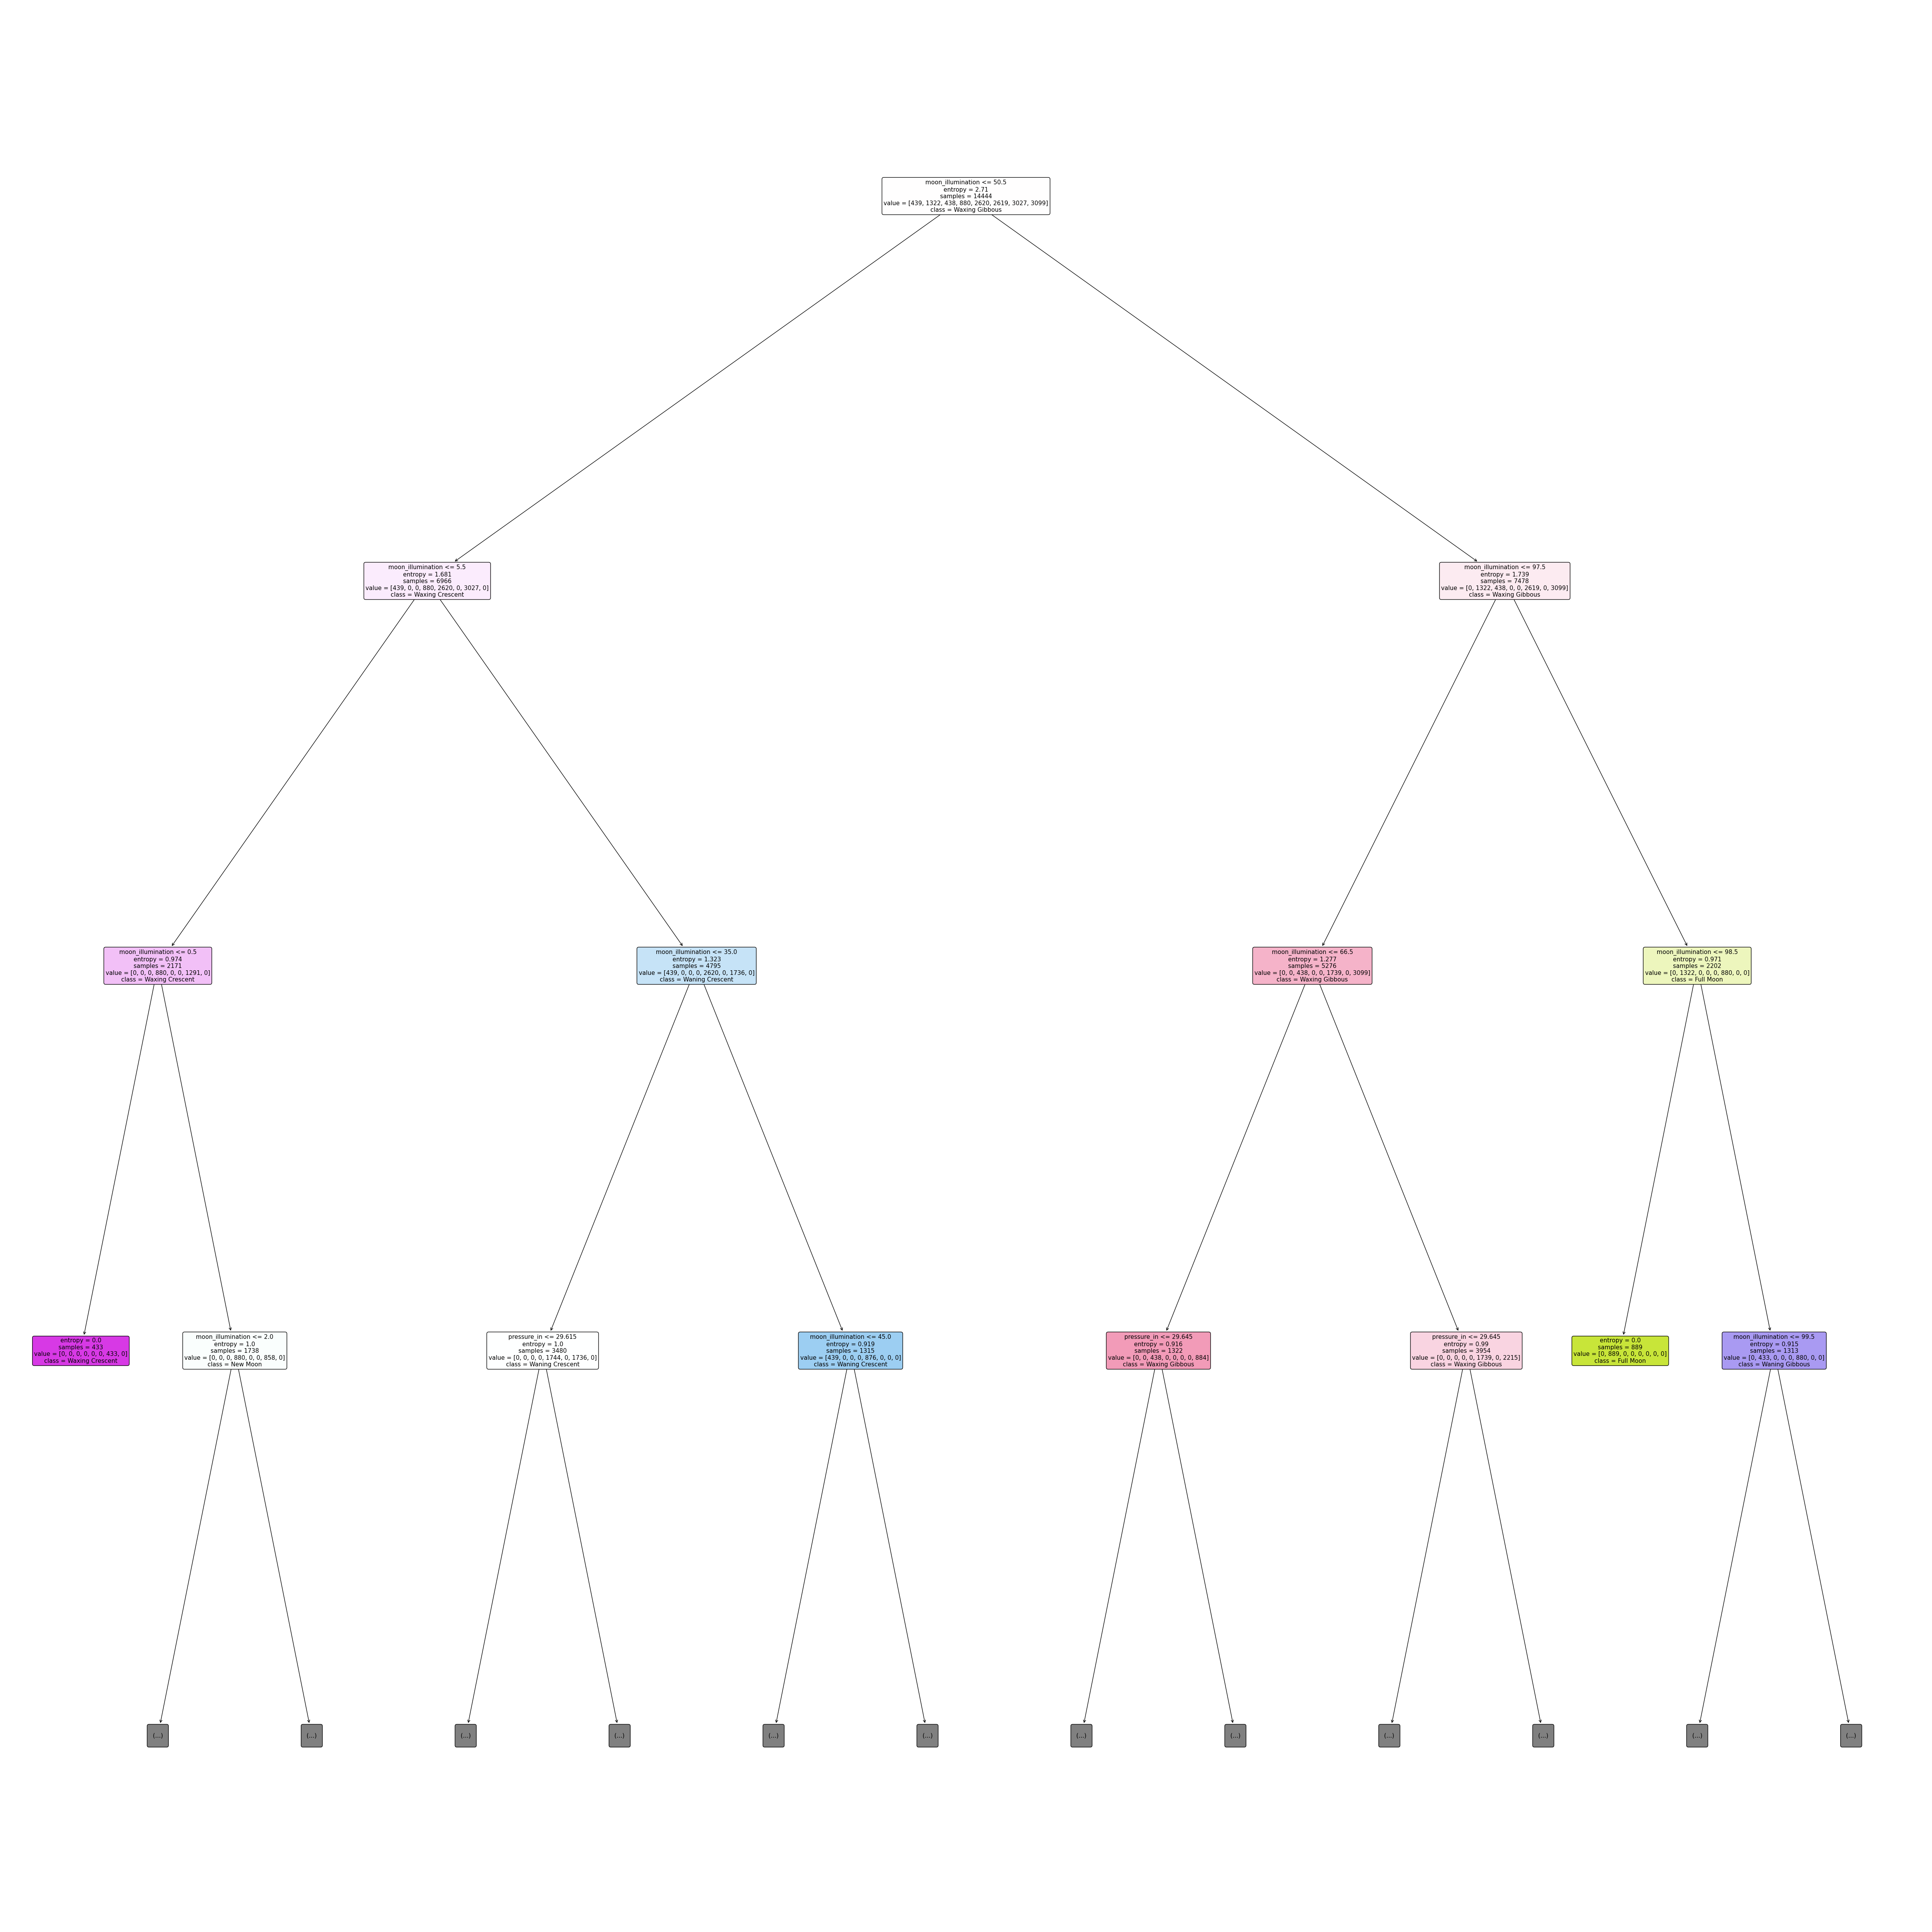

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(50,50))
tree.plot_tree(dt,
               feature_names=features,
               class_names=dt.classes_,
               rounded=True,
               filled=True,
               ax=axes,
               fontsize=11,
               max_depth=3
               )
plt.tight_layout()
None